<a href="https://colab.research.google.com/github/dasaparnabme07/Pneumonia-Detection-Using-PyTorch/blob/main/Pneumonia_detection_using_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%config Complier.use_jedi=False
%matplotlib inline

In [ ]:
import time
import copy
import glob
import random

import numpy as np
import pandas as pd
from PIL import Image

from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.models import resnet18, resnet34

In [ ]:
#Load Dataset
train_normal = glob.glob('/content/drive/MyDrive/chest-xray-pneumonia/chest_xray/train/NORMAL/*')
train_pneumonia = glob.glob('/content/drive/MyDrive/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/*')

test_normal = glob.glob('/content/drive/MyDrive/chest-xray-pneumonia/chest_xray/test/NORMAL/*')
test_pneumonia = glob.glob('/content/drive/MyDrive/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/*')

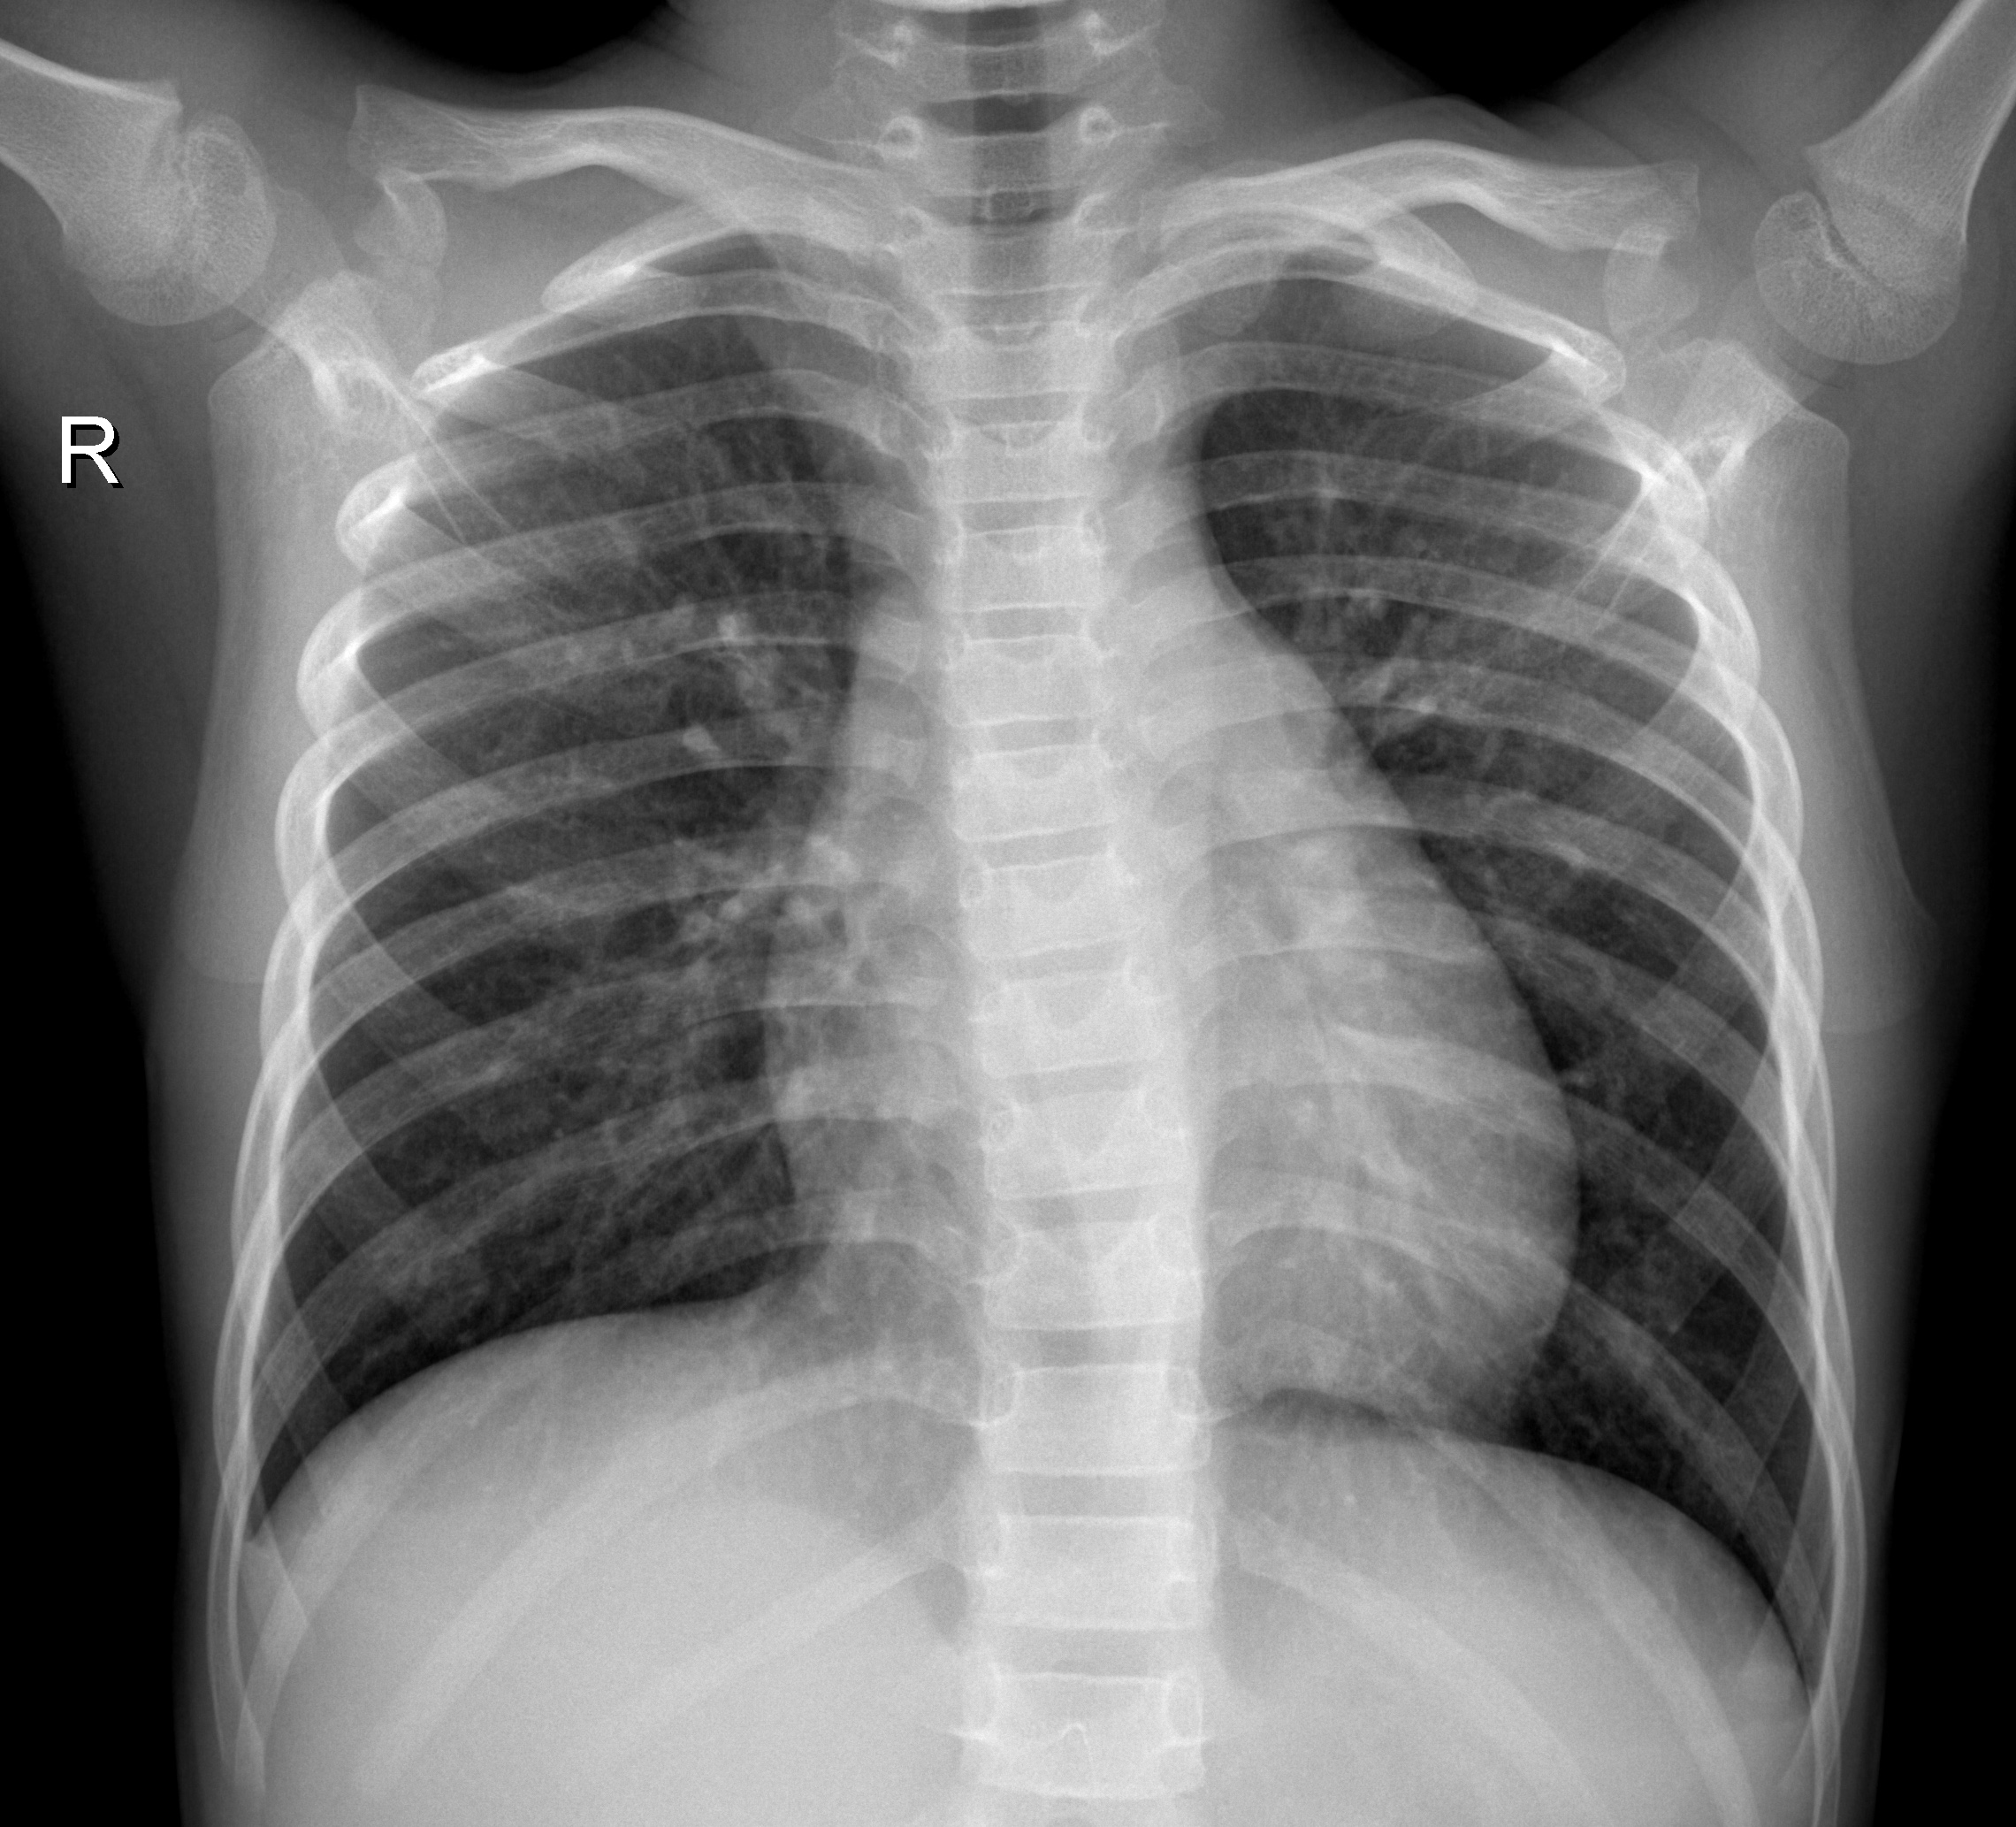

In [ ]:
#visualize image
img = Image.open(train_normal[1])
img

In [ ]:
# mix all the train normal and train pneumonia and test normal and test pneumonia
train_paths = train_normal + train_pneumonia
test_paths = test_normal + test_pneumonia

#add lebels (if an image has pneumonia then it will be 1, otherwise 0)
train_labels = [0] * len(train_normal) + [1] * len(train_pneumonia)
test_labels = [0] * len(test_normal) + [1] * len(test_pneumonia)

In [ ]:
print(len(train_paths), len(train_labels))
print(len(test_paths), len(test_labels))

5216 5216
4109 4109


In [ ]:
#prepare for train and test
train_paths, val_paths, train_labels, val_labels = train_test_split(train_paths,
                                                                    train_labels,
                                                                    stratify= train_labels) #follow the same distribution as train data


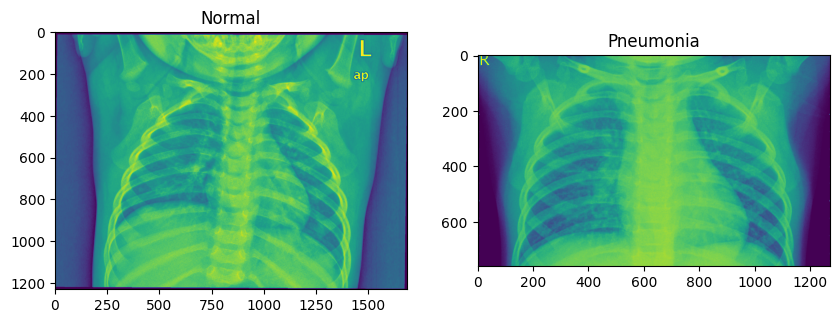

In [ ]:
#function for checking data
def check_data():
  check_data_normal = random.choice(train_normal)
  check_data_pneumonia = random.choice(train_pneumonia)

  fig = plt.figure(figsize=(10, 10))

  ax1= fig.add_subplot(1, 2, 1)
  ax1.imshow(plt.imread(check_data_normal))
  ax1.set_title('Normal')

  ax2= fig.add_subplot(1, 2, 2)
  ax2.imshow(plt.imread(check_data_pneumonia))
  ax2.set_title('Pneumonia')

check_data()




In [ ]:
#define dataset for pytorch
class XrayDataset(Dataset):
  def __init__(self, paths, labels, transform=None):
    self.paths = paths
    self.labels = labels
    self.transform = transform

#define dataset length
  def __len__(self):
    return len(self.paths) #the lenth of the dataset is same as paths
  def __getitem__(self, idx):
    path = self.paths[idx] #from this index we can extract the path
    image = Image.open(path).convert('RGB') #convert the image to RGB format

    if self.transform:
      image = self.transform(image)
    label = self.labels[idx]
    return image, label
#